# The Machine Learning Pipeline

This notebook will guide you through the fundamental steps of a typical machine learning pipeline.  Understanding this pipeline is crucial for building effective and reliable machine learning models.  The process can be broken down into the following key stages:

![Machine Learning Pipeline](img/ResearchPipeline.png)

**1. Data Acquisition:**

This is the initial step where we gather the raw data that will be used to train our model.  Data can come from various sources, including:

*   **Public Datasets:** Repositories like Kaggle, UCI Machine Learning Repository, and others offer a wealth of pre-collected data.
*   **APIs:** Many services provide APIs for accessing their data (e.g., social media platforms, financial data providers).
*   **Databases:** Organizations often store data in relational databases (SQL) or NoSQL databases.
*   **Web Scraping:** Extracting data from websites.
*   **Sensors and Devices:** Collecting data from IoT devices.
*   **Surveys and Experiments:** Gathering data through specific studies.

The quality and relevance of the data are paramount for the success of the entire pipeline.

**2. Data Exploration (Exploratory Data Analysis - EDA):**

Once we have the data, we need to understand it.  EDA involves:

*   **Data Summarization:** Calculating descriptive statistics (mean, median, standard deviation, etc.) to understand the distribution of variables.
*   **Data Visualization:** Creating plots (histograms, scatter plots, box plots, etc.) to visualize patterns, relationships, and anomalies in the data.
*   **Data Cleaning Identification:** Identifying missing values, outliers, and inconsistencies in the data.
*   **Feature Analysis:** Understanding the meaning and relevance of each feature (variable).

EDA helps us gain insights into the data and formulate hypotheses about the underlying relationships.

**3. Data Preprocessing:**

Real-world data is often messy and requires cleaning and transformation before it can be used for modeling.  Common preprocessing techniques include:

*   **Handling Missing Values:** Imputing missing values using techniques like mean/median imputation, k-NN imputation, or more sophisticated methods.
*   **Outlier Treatment:** Identifying and handling outliers, which can skew model training.
*   **Feature Scaling:** Scaling numerical features to a similar range (e.g., standardization, normalization) to prevent features with larger values from dominating the model.
*   **Feature Encoding:** Converting categorical features (e.g., colors, labels) into numerical representations (e.g., one-hot encoding, label encoding).
*   **Feature Transformation:** Applying transformations to features to improve model performance (e.g., logarithmic transformation, power transformation).

**4. Data Splitting:**

To evaluate the performance of our model on unseen data, we split the dataset into:

*   **Training Set:** Used to train the model.
*   **Test Set:** Used to evaluate the final performance of the trained model.  This set is held out and *not* used during training.

**5. Model Creation (Model Selection and Training):**

In this stage, we select an appropriate machine learning algorithm (e.g., linear regression, decision tree, random forest, neural network) based on the problem type (e.g., regression, classification, clustering) and the characteristics of the data.  We then train the model using the training data.  This involves adjusting the model's parameters to learn the underlying patterns in the data.

**6. Model Evaluation:**

After training the model, we evaluate its performance on the test set (and optionally the validation set).  We use appropriate evaluation metrics depending on the problem type:

*   **Regression:** Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared.
*   **Classification:** Accuracy, Precision, Recall, F1-score, AUC-ROC.

Model evaluation helps us assess how well the model generalizes to unseen data.

**7. Model Exportation (Deployment):**

Once we are satisfied with the model's performance, we can export it for deployment.  This involves saving the trained model in a format that can be easily loaded and used in a production environment.  The deployed model can then be used to make predictions on new, unseen data.  This stage also includes considerations like model monitoring and retraining as new data becomes available.

This notebook will explore each of these stages in detail, providing practical examples and code snippets using Python and popular machine learning libraries like scikit-learn. Let's get started!

# Case Study: Thyroid Disease Prediction

This notebook will explore the Thyroid Disease dataset, a popular benchmark dataset for classification tasks in machine learning, particularly in the medical domain.  The goal is to predict whether a patient has hyperthyroidism, hypothyroidism, or normal thyroid function based on various blood test results and other patient attributes.  Accurate and timely diagnosis of thyroid disorders is crucial, and machine learning models can assist medical professionals in this process.

The dataset is available from the UCI Machine Learning Repository: [Thyroid Disease Dataset](https://archive.ics.uci.edu/ml/datasets/thyroid+disease).  It consists of several features, including:

*   **Demographic Information:** Age, Sex
*   **Blood Test Results:** TSH (Thyroid Stimulating Hormone), T3 (Triiodothyronine), T4 (Thyroxine), T4U (Thyroxine Utilization), FTI (Free Thyroxine Index), and others.
*   **Binary and Categorical Attributes:**  Information about medication, surgery history, and other relevant medical conditions.
*   **Target Variable:**  Indicates the patient's thyroid condition (hyperthyroidism, hypothyroidism, or normal).

This dataset presents interesting challenges for machine learning, including handling missing values, dealing with imbalanced classes (some thyroid conditions might be more prevalent than others), and selecting the most relevant features for accurate prediction.

## Related Research

This notebook draws inspiration and benchmarks from the following research papers:

*   Chaubey et al. (2020). Thyroid Disease Prediction Using Machine Learning Approaches.

*   Yadav and Pal (2020). Prediction of thyroid disease using decision tree ensemble method.

## Data Acquisition

After downloading the dataset and extracting it, you will note that there are many files. Take some time to read the dataset description from the homepage and the recommended papers to identify the original dataset files which will be useful for comparison with the identified academic papers.

**P.S.** The two papers use different datasets, we shall focus on the Yadav and Pal 2020 paper.

In [115]:
# Load libraries
import os
import pandas as pd

# Load data
df = pd.read_csv(   os.path.join('data','thyroid+disease','sick.data'), 
                    header=None, na_values='?',index_col=False,skipinitialspace=True,
                    names=['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 
                            'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 
                            'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 
                            'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 
                            'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source', 'class'])

# Check the structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2799 non-null   float64
 1   sex                        2690 non-null   object 
 2   on_thyroxine               2800 non-null   object 
 3   query_on_thyroxine         2800 non-null   object 
 4   on_antithyroid_medication  2800 non-null   object 
 5   sick                       2800 non-null   object 
 6   pregnant                   2800 non-null   object 
 7   thyroid_surgery            2800 non-null   object 
 8   I131_treatment             2800 non-null   object 
 9   query_hypothyroid          2800 non-null   object 
 10  query_hyperthyroid         2800 non-null   object 
 11  lithium                    2800 non-null   object 
 12  goitre                     2800 non-null   object 
 13  tumor                      2800 non-null   objec

From the above we notice that we have a number of potential categorical variables, but cannot be sure. Checking the documentation and/or previewing the data would help

In [116]:
# Preview the first few rows
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,class
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative.|3733
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,negative.|1442
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,negative.|2965
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,NaN,other,negative.|806
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,negative.|2807


In [117]:
# Preview the last few rows
df.tail()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,class
2795,70.0,M,f,f,f,f,f,f,f,f,...,t,155.0,t,1.05,t,148.0,f,NaN,SVI,negative.|3689
2796,73.0,M,f,t,f,f,f,f,f,f,...,t,63.0,t,0.88,t,72.0,f,NaN,other,sick.|3652
2797,75.0,M,f,f,f,f,f,f,f,f,...,t,147.0,t,0.80,t,183.0,f,NaN,other,negative.|1287
2798,60.0,F,f,f,f,f,f,f,f,f,...,t,100.0,t,0.83,t,121.0,f,NaN,other,negative.|3496
2799,81.0,F,f,f,f,f,f,f,f,f,...,t,114.0,t,0.99,t,115.0,f,NaN,SVI,negative.|724


From the last two code cells we observe that the target variable needs cleaning.

## Data Exploration

#### Checking for nulls

In [118]:
# Checking for nulls
df.isnull().sum()

age                             1
sex                           110
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           284
T3_measured                     0
T3                            585
TT4_measured                    0
TT4                           184
T4U_measured                    0
T4U                           297
FTI_measured                    0
FTI                           295
TBG_measured                    0
TBG                          2800
referral_source                 0
class         

From the above we observe that TBG is irrelevant. The measured numerical predictors do not contain missing values yet TSH, T3, TT4, T4U and FTI do have missing values.

In [119]:
categorical = ['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
                'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary',
                'psych', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'referral_source']
numerical = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
target = 'class'

### Checking range of values

In [120]:
df[numerical].describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,2799.00000,2516.000000,2215.000000,2616.000000,2503.000000,2505.000000,0.0
mean,51.84423,4.672150,2.024966,109.072401,0.997912,110.787984,NaN
std,20.46116,21.449453,0.824600,35.392443,0.194390,32.883986,NaN
min,1.00000,0.005000,0.050000,2.000000,0.310000,2.000000,NaN
25%,36.00000,0.440000,1.600000,88.000000,0.880000,93.000000,NaN
50%,54.00000,1.400000,2.000000,104.000000,0.980000,107.000000,NaN
75%,67.00000,2.600000,2.400000,125.000000,1.080000,124.000000,NaN
max,455.00000,478.000000,10.600000,430.000000,2.120000,395.000000,NaN


Here we note a variety in the range of values. There is also an error in the age, with an individual at 455

In [121]:
# List entries whose age is higher than 100
df[df['age'] > 100]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,class
1364,455.0,F,f,f,f,f,f,f,f,f,...,t,118.0,t,1.13,t,104.0,f,NaN,SVI,negative.|861


This entry needs to be cleaned later on

In [122]:
# Explore the range of values of the categorical variables
for col in categorical:
    print(col, df[col].unique())

sex ['F' 'M' nan]
on_thyroxine ['f' 't']
query_on_thyroxine ['f' 't']
on_antithyroid_medication ['f' 't']
sick ['f' 't']
pregnant ['f' 't']
thyroid_surgery ['f' 't']
I131_treatment ['f' 't']
query_hypothyroid ['f' 't']
query_hyperthyroid ['f' 't']
lithium ['f' 't']
goitre ['f' 't']
tumor ['f' 't']
hypopituitary ['f' 't']
psych ['f' 't']
TSH_measured ['t' 'f']
T3_measured ['t' 'f']
TT4_measured ['t' 'f']
T4U_measured ['t' 'f']
FTI_measured ['t' 'f']
TBG_measured ['f']
referral_source ['SVHC' 'other' 'SVI' 'STMW' 'SVHD']


In [123]:
# Display the value counts for the categorical variables
for col in categorical:
    print(df[col].value_counts())

sex
F    1830
M     860
Name: count, dtype: int64
on_thyroxine
f    2470
t     330
Name: count, dtype: int64
query_on_thyroxine
f    2760
t      40
Name: count, dtype: int64
on_antithyroid_medication
f    2766
t      34
Name: count, dtype: int64
sick
f    2690
t     110
Name: count, dtype: int64
pregnant
f    2759
t      41
Name: count, dtype: int64
thyroid_surgery
f    2761
t      39
Name: count, dtype: int64
I131_treatment
f    2752
t      48
Name: count, dtype: int64
query_hypothyroid
f    2637
t     163
Name: count, dtype: int64
query_hyperthyroid
f    2627
t     173
Name: count, dtype: int64
lithium
f    2786
t      14
Name: count, dtype: int64
goitre
f    2775
t      25
Name: count, dtype: int64
tumor
f    2729
t      71
Name: count, dtype: int64
hypopituitary
f    2799
t       1
Name: count, dtype: int64
psych
f    2665
t     135
Name: count, dtype: int64
TSH_measured
t    2516
f     284
Name: count, dtype: int64
T3_measured
t    2215
f     585
Name: count, dtype: int64
TT4_meas

Here we observe that TBG_measured has only 1 unique value so is irrelevant. Also hypopituitary has only 1 observation that is true. Also there are low counts of true.

In [124]:
# Check unique values of target
df[target].unique()

array(['negative.|3733', 'negative.|1442', 'negative.|2965', ...,
       'negative.|1287', 'negative.|3496', 'negative.|724'], dtype=object)

### Cleaning target variable for exploration

Prior to being able to proceed with data exploration we need to clean the target variable.

In [125]:
# Clean the target variable
df['cleaned'] = df[target].str.split('.')
df['cleaned'] = df['cleaned'].apply(lambda x: x[0])
df.drop(target, axis=1, inplace=True)
df['cleaned']

0       negative
1       negative
2       negative
3       negative
4       negative
          ...   
2795    negative
2796        sick
2797    negative
2798    negative
2799    negative
Name: cleaned, Length: 2800, dtype: object

In [126]:
# Check the value counts of the cleaned target variable
df['cleaned'].value_counts()

cleaned
negative    2629
sick         171
Name: count, dtype: int64

In [127]:
# Check the percentage ratio of the cleaned target variable
df['cleaned'].value_counts(normalize=True)

cleaned
negative    0.938929
sick        0.061071
Name: proportion, dtype: float64

### Checking for duplicates

In [128]:
# Check for duplicates
df.duplicated().sum()

np.int64(47)

Some duplicates need to be removed. This was possible since we cleaned the target variable from the unique patient id.

### Checking distribution of values in variables

<Axes: xlabel='cleaned'>

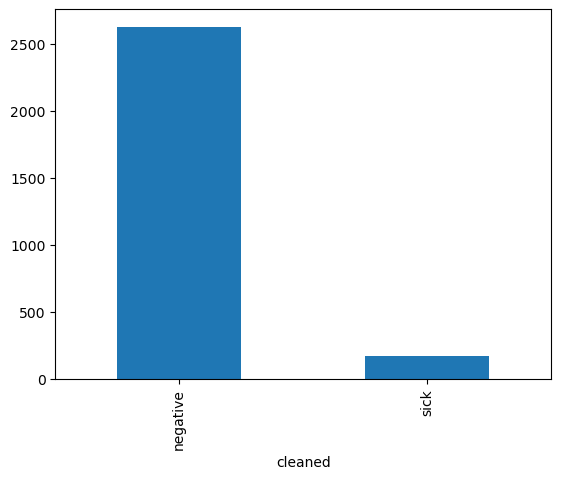

In [129]:
# Visualise the distribution of variables
target = 'cleaned'
df[target].value_counts().plot(kind='bar')

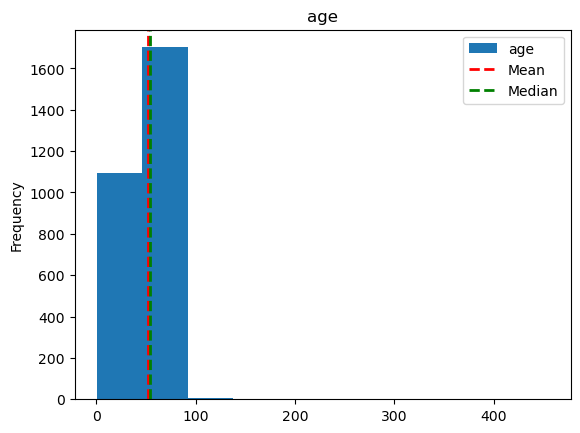

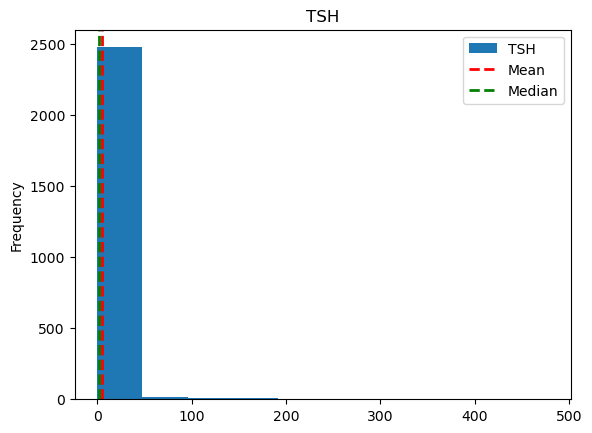

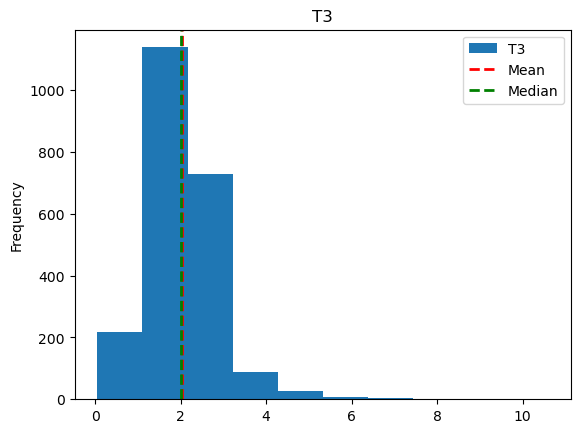

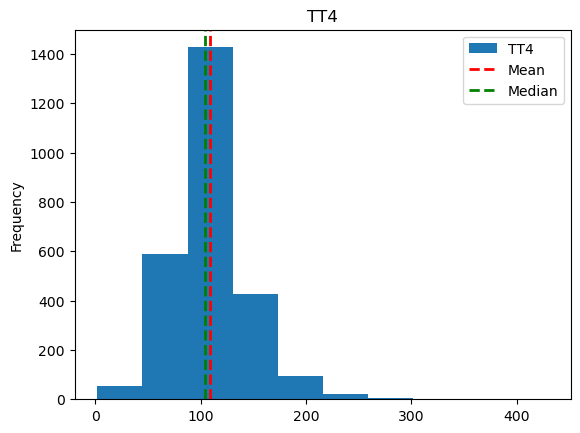

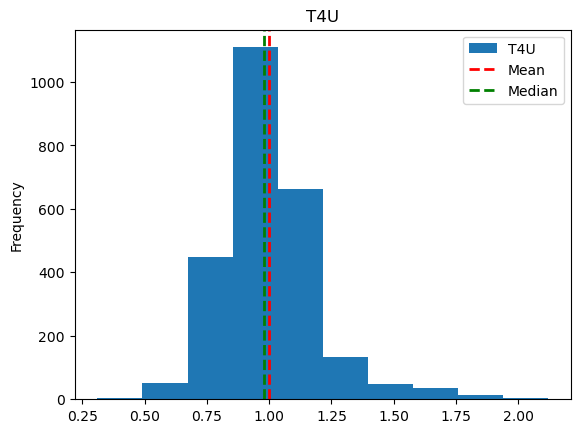

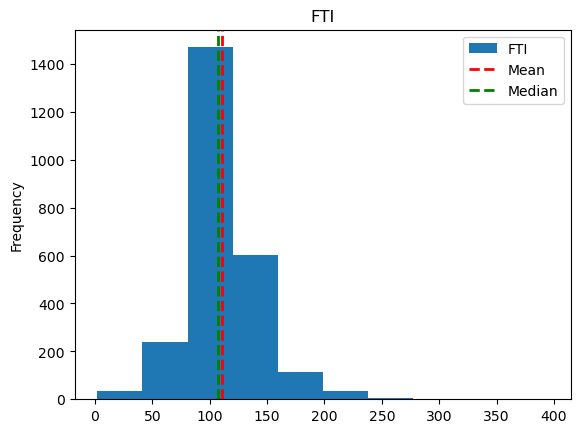

c:\ProgramData\Anaconda3\envs\ml01\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


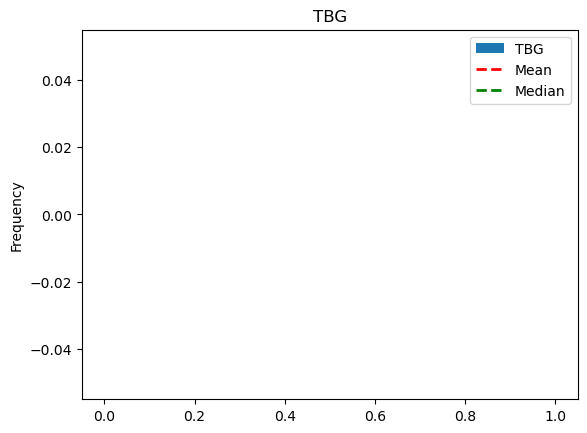

In [130]:
# Visualise the distribution of numerical variables
import matplotlib.pyplot as plt

for col in numerical:
    df[col].plot(kind='hist', title=col)
    plt.axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=2)
    plt.axvline(df[col].median(), color='g', linestyle='dashed', linewidth=2)
    plt.legend(loc='best', labels=[col, 'Mean', 'Median'])
    plt.show()

We note that there is a skewness in each histogram, therefore to replace missing values in these numerical predictors we shall opt for median.

### Checking for outliers

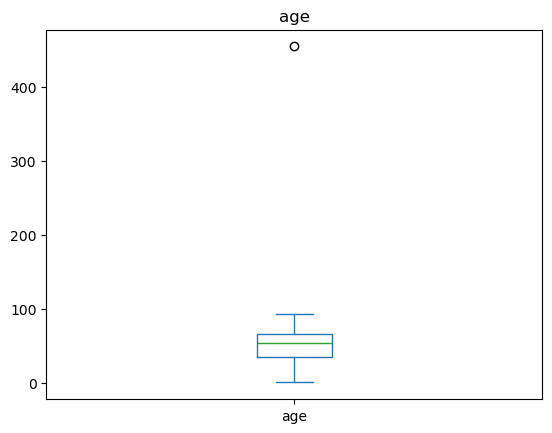

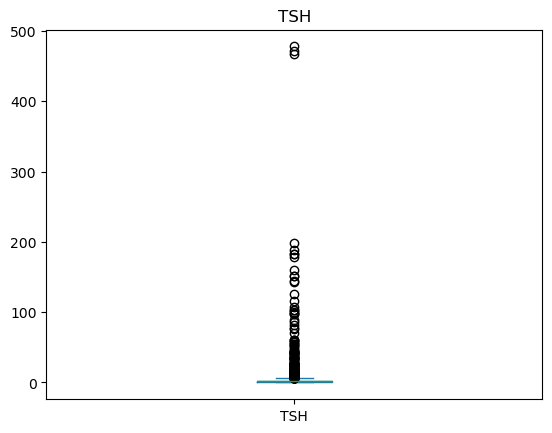

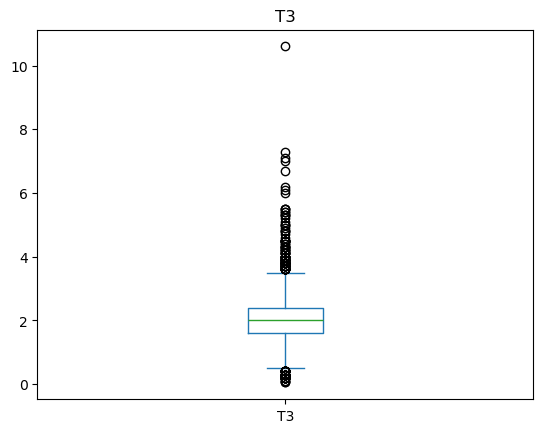

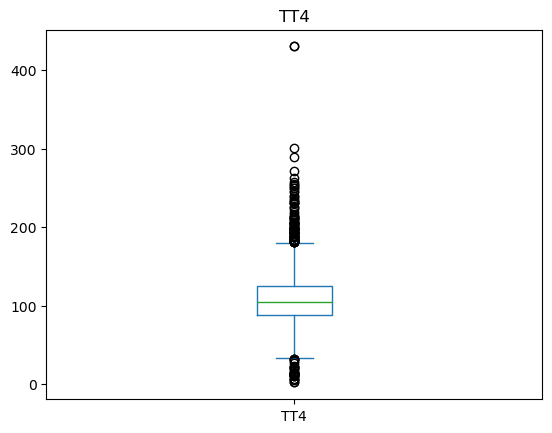

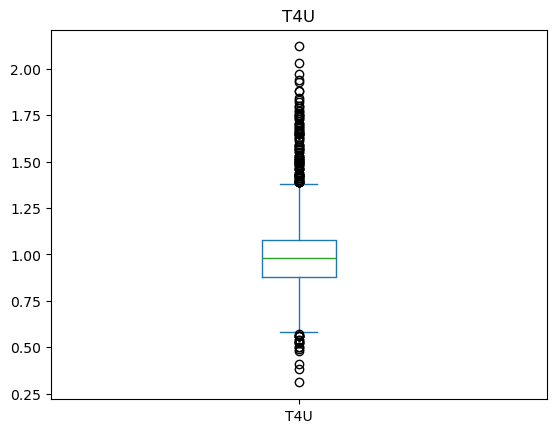

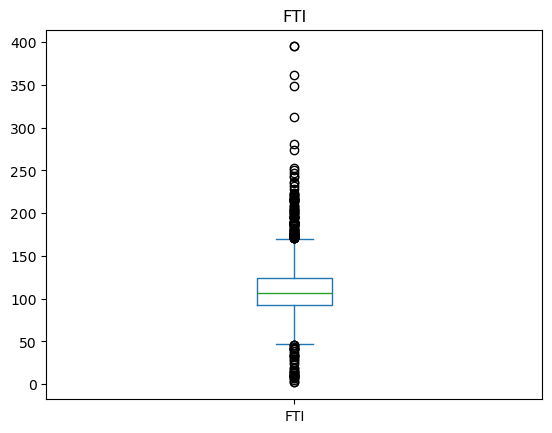

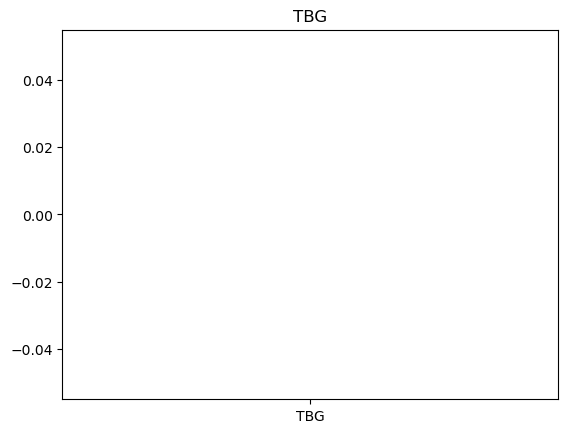

In [131]:
# Check for outliers
for col in numerical:
    df[col].plot(kind='box')
    plt.title(col)
    plt.show()

### Checking correlation

In [132]:
# Check correlation
df[numerical].corr()

,age,TSH,T3,TT4,T4U,FTI,TBG
age,1.000000,-0.059776,-0.244702,-0.052111,-0.163357,0.037623,NaN
TSH,-0.059776,1.000000,-0.160890,-0.254791,0.067705,-0.291188,NaN
T3,-0.244702,-0.160890,1.000000,0.563901,0.463434,0.351013,NaN
TT4,-0.052111,-0.254791,0.563901,1.000000,0.434248,0.795206,NaN
T4U,-0.163357,0.067705,0.463434,0.434248,1.000000,-0.173056,NaN
FTI,0.037623,-0.291188,0.351013,0.795206,-0.173056,1.000000,NaN
TBG,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Preprocessing

### Drop irrelevant variables

In [133]:
# Dropping irrelevant variables
df.drop(['TBG','TBG_measured'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2799 non-null   float64
 1   sex                        2690 non-null   object 
 2   on_thyroxine               2800 non-null   object 
 3   query_on_thyroxine         2800 non-null   object 
 4   on_antithyroid_medication  2800 non-null   object 
 5   sick                       2800 non-null   object 
 6   pregnant                   2800 non-null   object 
 7   thyroid_surgery            2800 non-null   object 
 8   I131_treatment             2800 non-null   object 
 9   query_hypothyroid          2800 non-null   object 
 10  query_hyperthyroid         2800 non-null   object 
 11  lithium                    2800 non-null   object 
 12  goitre                     2800 non-null   object 
 13  tumor                      2800 non-null   objec

In [134]:
# Update the list of variables
categorical = ['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
                'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary',
                'psych', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'referral_source']
numerical = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

### Dropping duplicates

In [135]:
# Drop duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2753 entries, 0 to 2799
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2752 non-null   float64
 1   sex                        2644 non-null   object 
 2   on_thyroxine               2753 non-null   object 
 3   query_on_thyroxine         2753 non-null   object 
 4   on_antithyroid_medication  2753 non-null   object 
 5   sick                       2753 non-null   object 
 6   pregnant                   2753 non-null   object 
 7   thyroid_surgery            2753 non-null   object 
 8   I131_treatment             2753 non-null   object 
 9   query_hypothyroid          2753 non-null   object 
 10  query_hyperthyroid         2753 non-null   object 
 11  lithium                    2753 non-null   object 
 12  goitre                     2753 non-null   object 
 13  tumor                      2753 non-null   object 
 1

### One Hot Encoding

In [137]:
# Map true to 1 and false to 0
df = df.replace({'t':1, 'f':0})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2753 entries, 0 to 2799
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2752 non-null   float64
 1   sex                        2644 non-null   object 
 2   on_thyroxine               2753 non-null   int64  
 3   query_on_thyroxine         2753 non-null   int64  
 4   on_antithyroid_medication  2753 non-null   int64  
 5   sick                       2753 non-null   int64  
 6   pregnant                   2753 non-null   int64  
 7   thyroid_surgery            2753 non-null   int64  
 8   I131_treatment             2753 non-null   int64  
 9   query_hypothyroid          2753 non-null   int64  
 10  query_hyperthyroid         2753 non-null   int64  
 11  lithium                    2753 non-null   int64  
 12  goitre                     2753 non-null   int64  
 13  tumor                      2753 non-null   int64  
 1

C:\Users\Frankie Inguanez\AppData\Local\Temp\ipykernel_18988\4208672914.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'t':1, 'f':0})


In [138]:
# Map male to 0 and female to 1 for sex variable, then rename
df = df.replace({'M':0, 'F':1})
df.rename(columns={'sex':'female'}, inplace=True)
df['female'] = df['female'].astype('category')

# Update the list of categorical variables
categorical.remove('sex')
categorical.append('female')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2753 entries, 0 to 2799
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   age                        2752 non-null   float64 
 1   female                     2644 non-null   category
 2   on_thyroxine               2753 non-null   int64   
 3   query_on_thyroxine         2753 non-null   int64   
 4   on_antithyroid_medication  2753 non-null   int64   
 5   sick                       2753 non-null   int64   
 6   pregnant                   2753 non-null   int64   
 7   thyroid_surgery            2753 non-null   int64   
 8   I131_treatment             2753 non-null   int64   
 9   query_hypothyroid          2753 non-null   int64   
 10  query_hyperthyroid         2753 non-null   int64   
 11  lithium                    2753 non-null   int64   
 12  goitre                     2753 non-null   int64   
 13  tumor                      2753 non-nu

C:\Users\Frankie Inguanez\AppData\Local\Temp\ipykernel_18988\2728996297.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'M':0, 'F':1})


In [139]:
# Clean referral source
df = pd.get_dummies(df, columns=['referral_source'], drop_first=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2753 entries, 0 to 2799
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   age                        2752 non-null   float64 
 1   female                     2644 non-null   category
 2   on_thyroxine               2753 non-null   int64   
 3   query_on_thyroxine         2753 non-null   int64   
 4   on_antithyroid_medication  2753 non-null   int64   
 5   sick                       2753 non-null   int64   
 6   pregnant                   2753 non-null   int64   
 7   thyroid_surgery            2753 non-null   int64   
 8   I131_treatment             2753 non-null   int64   
 9   query_hypothyroid          2753 non-null   int64   
 10  query_hyperthyroid         2753 non-null   int64   
 11  lithium                    2753 non-null   int64   
 12  goitre                     2753 non-null   int64   
 13  tumor                      2753 non-nu

In [140]:
df = df.replace({True:1, False:0})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2753 entries, 0 to 2799
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   age                        2752 non-null   float64 
 1   female                     2644 non-null   category
 2   on_thyroxine               2753 non-null   int64   
 3   query_on_thyroxine         2753 non-null   int64   
 4   on_antithyroid_medication  2753 non-null   int64   
 5   sick                       2753 non-null   int64   
 6   pregnant                   2753 non-null   int64   
 7   thyroid_surgery            2753 non-null   int64   
 8   I131_treatment             2753 non-null   int64   
 9   query_hypothyroid          2753 non-null   int64   
 10  query_hyperthyroid         2753 non-null   int64   
 11  lithium                    2753 non-null   int64   
 12  goitre                     2753 non-null   int64   
 13  tumor                      2753 non-nu

C:\Users\Frankie Inguanez\AppData\Local\Temp\ipykernel_18988\1361430959.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True:1, False:0})


### Rename target variable

In [141]:
# Clean and rename the target variable
df.rename(columns={'cleaned': 'class'}, inplace=True)
target='class'

df[target] = df[target].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2753 entries, 0 to 2799
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   age                        2752 non-null   float64 
 1   female                     2644 non-null   category
 2   on_thyroxine               2753 non-null   int64   
 3   query_on_thyroxine         2753 non-null   int64   
 4   on_antithyroid_medication  2753 non-null   int64   
 5   sick                       2753 non-null   int64   
 6   pregnant                   2753 non-null   int64   
 7   thyroid_surgery            2753 non-null   int64   
 8   I131_treatment             2753 non-null   int64   
 9   query_hypothyroid          2753 non-null   int64   
 10  query_hyperthyroid         2753 non-null   int64   
 11  lithium                    2753 non-null   int64   
 12  goitre                     2753 non-null   int64   
 13  tumor                      2753 non-nu

### Fixing of numerical outliers

In [142]:
# Fix the age outlier, replace 455 to 45
df['age'] = df['age'].replace(455, 45)
df['age'].describe()

count    2752.000000
mean       51.818314
std        19.018092
min         1.000000
25%        36.000000
50%        54.500000
75%        67.000000
max        94.000000
Name: age, dtype: float64

### Data normalization

This step has proven to be very important.

In [143]:
# Normalise the numerical variables
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numerical] = scaler.fit_transform(df[numerical])
df[numerical].describe()

,age,TSH,T3,TT4,T4U,FTI
count,2752.000000,2516.000000,2215.000000,2616.000000,2503.000000,2505.000000
mean,0.546433,0.009764,0.187201,0.250169,0.380062,0.276814
std,0.204496,0.044874,0.078161,0.082693,0.107398,0.083674
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.376344,0.000910,0.146919,0.200935,0.314917,0.231552
50%,0.575269,0.002918,0.184834,0.238318,0.370166,0.267176
75%,0.709677,0.005429,0.222749,0.287383,0.425414,0.310433
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Impute missing values

In [144]:
# Check for missing values
df.isnull().sum()

age                            1
female                       109
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH_measured                   0
TSH                          237
T3_measured                    0
T3                           538
TT4_measured                   0
TT4                          137
T4U_measured                   0
T4U                          250
FTI_measured                   0
FTI                          248
class                          0
referral_source_STMW           0
referral_source_SVHC           0
referral_source_SVHD           0
referral_s

Here we observe that only sex is the categorical variable with missing values, whilst the others are numerical

#### Imputing missing values for numerical predictors

In [145]:
# Using the median to impute missing numerical values
for col in numerical:
    if (not df[col].hasnans):
        continue
    median = df[col].median()
    df.fillna({col:median}, inplace=True)

df.isnull().sum()

age                            0
female                       109
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH_measured                   0
TSH                            0
T3_measured                    0
T3                             0
TT4_measured                   0
TT4                            0
T4U_measured                   0
T4U                            0
FTI_measured                   0
FTI                            0
class                          0
referral_source_STMW           0
referral_source_SVHC           0
referral_source_SVHD           0
referral_s

#### Imputing missing values for sole categorical variable

In [146]:
# Check for the outlier in female
df[(df['pregnant']==1) & df['female'].isnull()]

,age,female,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T4U_measured,T4U,FTI_measured,FTI,class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
1609,0.774194,NaN,0,0,0,0,1,0,0,0,...,1,0.535912,1,0.211196,negative,0,0,0,0,1


In [147]:
# Impute this specific entry
df.loc[(df['pregnant']==1) & df['female'].isnull(),'female']=1
df.isnull().sum()

age                            0
female                       108
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH_measured                   0
TSH                            0
T3_measured                    0
T3                             0
TT4_measured                   0
TT4                            0
T4U_measured                   0
T4U                            0
FTI_measured                   0
FTI                            0
class                          0
referral_source_STMW           0
referral_source_SVHC           0
referral_source_SVHD           0
referral_s

In [148]:
# Get list of columns to serve as predictors for classification of gender
cols = df.columns.to_list()
cols.remove(target)
cols.remove('female') # The target for imputting missing values
cols # The set of predictor variables for imputting missing values

['age',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'sick',
 'pregnant',
 'thyroid_surgery',
 'I131_treatment',
 'query_hypothyroid',
 'query_hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'TSH_measured',
 'TSH',
 'T3_measured',
 'T3',
 'TT4_measured',
 'TT4',
 'T4U_measured',
 'T4U',
 'FTI_measured',
 'FTI',
 'referral_source_STMW',
 'referral_source_SVHC',
 'referral_source_SVHD',
 'referral_source_SVI',
 'referral_source_other']

In [149]:
# Create a model to classify gender
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Filter to retrieve rows with no missing values
no_missing = df.dropna()
X_no_missing = no_missing[cols]
y_no_missing = no_missing['female']

# Split the dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X_no_missing, y_no_missing,
                                                    test_size=0.5, random_state=0,
                                                    stratify=y_no_missing)

# Create the model and balance the weight for the class distribution
model_for_female = RandomForestClassifier(random_state=0, class_weight='balanced')
model_for_female.fit(X_train,y_train)

# Predict
y_pred = model_for_female.predict(X_test)

# Check accuracy
print(accuracy_score(y_test, y_pred))

# Check confusion matrix
print(confusion_matrix(y_test, y_pred))

# Check classification report
print(classification_report(y_test, y_pred))

0.6802721088435374
[[140 289]
 [134 760]]
              precision    recall  f1-score   support

         0.0       0.51      0.33      0.40       429
         1.0       0.72      0.85      0.78       894

    accuracy                           0.68      1323
   macro avg       0.62      0.59      0.59      1323
weighted avg       0.66      0.68      0.66      1323



We observe that the weighted average precision is at 66%, which is low but we are trying an experiment which is marginally different from other researchers and aiming for a contribution.

In [150]:
# Use the model to predict missing values
missing = df[df['female'].isnull()]
X_missing = missing[cols]
y_missing = model_for_female.predict(X_missing)

# Impute the missing values
df.loc[df['female'].isnull(),'female'] = y_missing

# Verify
df.isnull().sum()

age                          0
female                       0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
class                        0
referral_source_STMW         0
referral_source_SVHC         0
referral_source_SVHD         0
referral_source_SVI          0
referral_source_other        0
dtype: i

In [151]:
# Export the model for future use
import pickle

os.makedirs('models', exist_ok=True)

with open(os.path.join('models','thyroid_female_model.pkl'), 'wb') as file:
    pickle.dump(model_for_female, file)

## Split data

Even though the data is already split in train and test, we shall split another time for the validation dataset.


In [152]:
# Ensure the proper target variable name
target = 'class'

# Separate predictors and target
X = df.drop(target, axis=1)
y = df[target]

# Split in train and validation dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, 
                                                    random_state=0,
                                                    stratify=y)

print(X_train.shape)
print(X_test.shape)

(1376, 31)
(1377, 31)


## Train a model

In [153]:
# Train the model using repeated k-fold cross validation

from sklearn.model_selection import RandomizedSearchCV

# Specify the search paramter grid
params = {'n_estimators': [100,150,200], 'max_depth':[5,10,15,20], 
          'random_state':[0,35,42]} # These were taken from the recommended literature

model = RandomForestClassifier()
search = RandomizedSearchCV(model, param_distributions=params,
                            n_iter=10, cv=5, scoring='accuracy',
                            n_jobs=-1, random_state=0,
                            verbose=5)

search.fit(X_train, y_train)

# Get the best estimator
print(search.best_params_)
print(search.best_score_)
print(search.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'random_state': 42, 'n_estimators': 100, 'max_depth': 10}
0.9818313570487482
RandomForestClassifier(max_depth=10, random_state=42)


## Evaluate model

In [154]:
# Evaluate model on validation set
y_pred = search.predict(X_test)

# Check the accuracy
print(accuracy_score(y_test, y_pred))

# Check confusion matrix
print(confusion_matrix(y_test, y_pred))

# Check the classification report
print(classification_report(y_test, y_pred))

0.9869281045751634
[[1290    1]
 [  17   69]]
              precision    recall  f1-score   support

    negative       0.99      1.00      0.99      1291
        sick       0.99      0.80      0.88        86

    accuracy                           0.99      1377
   macro avg       0.99      0.90      0.94      1377
weighted avg       0.99      0.99      0.99      1377



## Export model

In [155]:
# Export the model
with open(os.path.join('models', 'thyroid_model.pkl'), 'wb') as file:
    pickle.dump(search, file)

## Run model on test dataset

### Data acquisition

In [156]:
# Load data
df_test = pd.read_csv(   os.path.join('data','thyroid+disease','sick.test'), 
                    header=None, na_values='?',index_col=False,skipinitialspace=True,
                    names=['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 
                            'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 
                            'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 
                            'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 
                            'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source', 'class'])

# Check the structure
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        972 non-null    int64  
 1   sex                        932 non-null    object 
 2   on_thyroxine               972 non-null    object 
 3   query_on_thyroxine         972 non-null    object 
 4   on_antithyroid_medication  972 non-null    object 
 5   sick                       972 non-null    object 
 6   pregnant                   972 non-null    object 
 7   thyroid_surgery            972 non-null    object 
 8   I131_treatment             972 non-null    object 
 9   query_hypothyroid          972 non-null    object 
 10  query_hyperthyroid         972 non-null    object 
 11  lithium                    972 non-null    object 
 12  goitre                     972 non-null    object 
 13  tumor                      972 non-null    object 

In [157]:
# Preview the test data
df_test.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,class
0,35,F,f,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,f,NaN,other,negative.|219
1,63,M,f,f,f,f,f,f,f,f,...,t,108.0,t,0.96,t,113.0,f,NaN,SVI,negative.|2059
2,25,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.82,t,75.0,f,NaN,SVHD,negative.|399
3,53,F,f,f,f,f,f,f,f,t,...,t,145.0,t,1.03,t,141.0,f,NaN,other,negative.|1911
4,92,F,f,f,f,f,f,f,f,f,...,t,120.0,t,0.84,t,143.0,f,NaN,SVI,negative.|487


### Data Exploration

#### Check for nulls

In [158]:
# Checking for nulls
df_test.isnull().sum()

age                            0
sex                           40
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH_measured                   0
TSH                           85
T3_measured                    0
T3                           184
TT4_measured                   0
TT4                           47
T4U_measured                   0
T4U                           90
FTI_measured                   0
FTI                           90
TBG_measured                   0
TBG                          972
referral_source                0
class                          0
dtype: int

#### Check range of values

In [159]:
categorical = ['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
                'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary',
                'psych', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'referral_source']
numerical = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
target = 'class'

In [160]:
df_test[numerical].describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,972.000000,887.000000,788.000000,925.000000,882.000000,882.000000,0.0
mean,51.423868,6.262835,1.981269,106.189622,0.986735,109.565533,NaN
std,18.966700,31.638353,0.835031,36.130949,0.198332,33.669539,NaN
min,7.000000,0.005000,0.200000,2.900000,0.250000,2.800000,NaN
25%,35.000000,0.515000,1.500000,87.000000,0.870000,92.000000,NaN
50%,54.000000,1.300000,2.000000,103.000000,0.970000,106.000000,NaN
75%,67.000000,2.900000,2.300000,123.000000,1.080000,124.000000,NaN
max,93.000000,530.000000,8.500000,372.000000,2.320000,291.000000,NaN


In [161]:
for col in categorical:
    print(col, df_test[col].unique())

sex ['F' 'M' nan]
on_thyroxine ['f' 't']
query_on_thyroxine ['f' 't']
on_antithyroid_medication ['f' 't']
sick ['f' 't']
pregnant ['f' 't']
thyroid_surgery ['f' 't']
I131_treatment ['f' 't']
query_hypothyroid ['f' 't']
query_hyperthyroid ['f' 't']
lithium ['f' 't']
goitre ['f' 't']
tumor ['f' 't']
hypopituitary ['f']
psych ['f' 't']
TSH_measured ['f' 't']
T3_measured ['f' 't']
TT4_measured ['f' 't']
T4U_measured ['f' 't']
FTI_measured ['f' 't']
TBG_measured ['f']
referral_source ['other' 'SVI' 'SVHD' 'SVHC' 'STMW']


We note that there is the same issue with TBG and TBG_measured. We also note that the hypopituitary has one unique variable. Since we did not remove it in the training of the model, we cannot do so for the test since the model is expecting that variable.

In [162]:
# Check the value counts
for col in categorical:
    print(col, df_test[col].value_counts())

sex sex
F    650
M    282
Name: count, dtype: int64
on_thyroxine on_thyroxine
f    838
t    134
Name: count, dtype: int64
query_on_thyroxine query_on_thyroxine
f    962
t     10
Name: count, dtype: int64
on_antithyroid_medication on_antithyroid_medication
f    963
t      9
Name: count, dtype: int64
sick sick
f    935
t     37
Name: count, dtype: int64
pregnant pregnant
f    960
t     12
Name: count, dtype: int64
thyroid_surgery thyroid_surgery
f    958
t     14
Name: count, dtype: int64
I131_treatment I131_treatment
f    961
t     11
Name: count, dtype: int64
query_hypothyroid query_hypothyroid
f    901
t     71
Name: count, dtype: int64
query_hyperthyroid query_hyperthyroid
f    908
t     64
Name: count, dtype: int64
lithium lithium
f    968
t      4
Name: count, dtype: int64
goitre goitre
f    963
t      9
Name: count, dtype: int64
tumor tumor
f    947
t     25
Name: count, dtype: int64
hypopituitary hypopituitary
f    972
Name: count, dtype: int64
psych psych
f    923
t     49
Name:

In [163]:
# Check the values of target variable
df_test[target].unique()

array(['negative.|219', 'negative.|2059', 'negative.|399',
       'negative.|1911', 'negative.|487', 'negative.|1234',
       'negative.|1113', 'negative.|1344', 'negative.|2758',
       'negative.|3230', 'negative.|1249', 'negative.|825',
       'negative.|3231', 'negative.|3563', 'negative.|3076',
       'negative.|3272', 'negative.|3710', 'negative.|1957',
       'negative.|567', 'negative.|1721', 'negative.|3595',
       'negative.|3368', 'negative.|1510', 'negative.|352',
       'negative.|3458', 'negative.|3735', 'negative.|1614',
       'negative.|1216', 'negative.|3386', 'negative.|501',
       'negative.|1798', 'negative.|191', 'negative.|947',
       'negative.|595', 'negative.|663', 'negative.|2095',
       'negative.|1952', 'negative.|1610', 'negative.|1369',
       'negative.|917', 'negative.|2344', 'negative.|3495',
       'negative.|2673', 'negative.|2482', 'negative.|3158',
       'negative.|2576', 'negative.|46', 'negative.|3425',
       'negative.|507', 'negative.|244

### Data Preprocessing

#### Clean target variable

In [164]:
# Clean the target variable
df_test['cleaned'] = df_test[target].str.split('.')
df_test['cleaned'] = df_test['cleaned'].apply(lambda x: x[0])
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        972 non-null    int64  
 1   sex                        932 non-null    object 
 2   on_thyroxine               972 non-null    object 
 3   query_on_thyroxine         972 non-null    object 
 4   on_antithyroid_medication  972 non-null    object 
 5   sick                       972 non-null    object 
 6   pregnant                   972 non-null    object 
 7   thyroid_surgery            972 non-null    object 
 8   I131_treatment             972 non-null    object 
 9   query_hypothyroid          972 non-null    object 
 10  query_hyperthyroid         972 non-null    object 
 11  lithium                    972 non-null    object 
 12  goitre                     972 non-null    object 
 13  tumor                      972 non-null    object 

#### Drop irrelevant variables

In [165]:
# Remove the same variables removed in target
df_test.drop(['TBG', 'TBG_measured'], axis=1, inplace=True)
df_test.drop('class', axis=1, inplace=True)

# Revise the categorical and numerical variable lists
numerical.remove('TBG')
categorical.remove('TBG_measured')

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        972 non-null    int64  
 1   sex                        932 non-null    object 
 2   on_thyroxine               972 non-null    object 
 3   query_on_thyroxine         972 non-null    object 
 4   on_antithyroid_medication  972 non-null    object 
 5   sick                       972 non-null    object 
 6   pregnant                   972 non-null    object 
 7   thyroid_surgery            972 non-null    object 
 8   I131_treatment             972 non-null    object 
 9   query_hypothyroid          972 non-null    object 
 10  query_hyperthyroid         972 non-null    object 
 11  lithium                    972 non-null    object 
 12  goitre                     972 non-null    object 
 13  tumor                      972 non-null    object 

In [166]:
# Check for duplicates
df_test.duplicated().sum()

np.int64(3)

Even though we have identified duplicate rows in the test dataset, we shall not remove, so that our methodology matches as much as possible that of other researchers.

#### Rename target variable

In [167]:
df_test.rename(columns={'cleaned':'class'}, inplace=True)
target='class'
df_test[target] = df_test[target].astype('category')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   age                        972 non-null    int64   
 1   sex                        932 non-null    object  
 2   on_thyroxine               972 non-null    object  
 3   query_on_thyroxine         972 non-null    object  
 4   on_antithyroid_medication  972 non-null    object  
 5   sick                       972 non-null    object  
 6   pregnant                   972 non-null    object  
 7   thyroid_surgery            972 non-null    object  
 8   I131_treatment             972 non-null    object  
 9   query_hypothyroid          972 non-null    object  
 10  query_hyperthyroid         972 non-null    object  
 11  lithium                    972 non-null    object  
 12  goitre                     972 non-null    object  
 13  tumor                      972 non-

#### One hot encoding

In [168]:
# Map the True values to 1 and False to 0
df_test = df_test.replace({'t': 1, 'f': 0})
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   age                        972 non-null    int64   
 1   sex                        932 non-null    object  
 2   on_thyroxine               972 non-null    int64   
 3   query_on_thyroxine         972 non-null    int64   
 4   on_antithyroid_medication  972 non-null    int64   
 5   sick                       972 non-null    int64   
 6   pregnant                   972 non-null    int64   
 7   thyroid_surgery            972 non-null    int64   
 8   I131_treatment             972 non-null    int64   
 9   query_hypothyroid          972 non-null    int64   
 10  query_hyperthyroid         972 non-null    int64   
 11  lithium                    972 non-null    int64   
 12  goitre                     972 non-null    int64   
 13  tumor                      972 non-

C:\Users\Frankie Inguanez\AppData\Local\Temp\ipykernel_18988\1137621336.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test = df_test.replace({'t': 1, 'f': 0})


In [169]:
# Address the sex variable
df_test = df_test.replace({'M':0,'F':1})
df_test.rename(columns={'sex':'female'}, inplace=True)
df_test['female'] = df_test['female'].astype('category')

# Update list of categorical variables
categorical.remove('sex')
categorical.append('female')

# Check structure
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   age                        972 non-null    int64   
 1   female                     932 non-null    category
 2   on_thyroxine               972 non-null    int64   
 3   query_on_thyroxine         972 non-null    int64   
 4   on_antithyroid_medication  972 non-null    int64   
 5   sick                       972 non-null    int64   
 6   pregnant                   972 non-null    int64   
 7   thyroid_surgery            972 non-null    int64   
 8   I131_treatment             972 non-null    int64   
 9   query_hypothyroid          972 non-null    int64   
 10  query_hyperthyroid         972 non-null    int64   
 11  lithium                    972 non-null    int64   
 12  goitre                     972 non-null    int64   
 13  tumor                      972 non-

C:\Users\Frankie Inguanez\AppData\Local\Temp\ipykernel_18988\2800246843.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test = df_test.replace({'M':0,'F':1})


In [170]:
# Apply one hot encoding to the rest
df_test = pd.get_dummies(df_test, columns=['referral_source'], drop_first=False)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   age                        972 non-null    int64   
 1   female                     932 non-null    category
 2   on_thyroxine               972 non-null    int64   
 3   query_on_thyroxine         972 non-null    int64   
 4   on_antithyroid_medication  972 non-null    int64   
 5   sick                       972 non-null    int64   
 6   pregnant                   972 non-null    int64   
 7   thyroid_surgery            972 non-null    int64   
 8   I131_treatment             972 non-null    int64   
 9   query_hypothyroid          972 non-null    int64   
 10  query_hyperthyroid         972 non-null    int64   
 11  lithium                    972 non-null    int64   
 12  goitre                     972 non-null    int64   
 13  tumor                      972 non-

In [171]:
# Final converstion for boolean
df_test = df_test.replace({True:1, False:0})
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   age                        972 non-null    int64   
 1   female                     932 non-null    category
 2   on_thyroxine               972 non-null    int64   
 3   query_on_thyroxine         972 non-null    int64   
 4   on_antithyroid_medication  972 non-null    int64   
 5   sick                       972 non-null    int64   
 6   pregnant                   972 non-null    int64   
 7   thyroid_surgery            972 non-null    int64   
 8   I131_treatment             972 non-null    int64   
 9   query_hypothyroid          972 non-null    int64   
 10  query_hyperthyroid         972 non-null    int64   
 11  lithium                    972 non-null    int64   
 12  goitre                     972 non-null    int64   
 13  tumor                      972 non-

C:\Users\Frankie Inguanez\AppData\Local\Temp\ipykernel_18988\1472028340.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test = df_test.replace({True:1, False:0})


#### Data normalization

In [172]:
# Normalization of data
scaler = MinMaxScaler()
df_test[numerical] = scaler.fit_transform(df_test[numerical])
df_test.describe()

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
count,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,...,925.000000,972.000000,882.000000,972.000000,882.000000,972.000000,972.000000,972.000000,972.000000,972.000000
mean,0.516557,0.137860,0.010288,0.009259,0.038066,0.012346,0.014403,0.011317,0.073045,0.065844,...,0.279842,0.907407,0.355910,0.907407,0.370456,0.021605,0.114198,0.008230,0.270576,0.585391
std,0.220543,0.344931,0.100959,0.095828,0.191454,0.110480,0.119208,0.105832,0.260345,0.248136,...,0.097889,0.290010,0.095812,0.290010,0.116827,0.145465,0.318215,0.090394,0.444486,0.492908
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.325581,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.227852,1.000000,0.299517,1.000000,0.309507,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.546512,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.271200,1.000000,0.347826,1.000000,0.358085,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.697674,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.325386,1.000000,0.400966,1.000000,0.420541,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Imputing missing data

In [173]:
# Check missing values
df_test.isnull().sum()

age                            0
female                        40
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH_measured                   0
TSH                           85
T3_measured                    0
T3                           184
TT4_measured                   0
TT4                           47
T4U_measured                   0
T4U                           90
FTI_measured                   0
FTI                           90
class                          0
referral_source_STMW           0
referral_source_SVHC           0
referral_source_SVHD           0
referral_s

##### Imputing for numerical variables

In [174]:
# Using the median to impute missing values
for col in numerical:
    if (not df_test[col].hasnans):
        continue

    median = df_test[col].median()
    df_test.fillna({col:median}, inplace=True)

df_test.isnull().sum()

age                           0
female                       40
on_thyroxine                  0
query_on_thyroxine            0
on_antithyroid_medication     0
sick                          0
pregnant                      0
thyroid_surgery               0
I131_treatment                0
query_hypothyroid             0
query_hyperthyroid            0
lithium                       0
goitre                        0
tumor                         0
hypopituitary                 0
psych                         0
TSH_measured                  0
TSH                           0
T3_measured                   0
T3                            0
TT4_measured                  0
TT4                           0
T4U_measured                  0
T4U                           0
FTI_measured                  0
FTI                           0
class                         0
referral_source_STMW          0
referral_source_SVHC          0
referral_source_SVHD          0
referral_source_SVI           0
referral

##### Impute categorical variable

In [175]:
# Listing entries where pregnant but female is null
df_test[(df_test['pregnant']==1) & df_test['female'].isnull()]

,age,female,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T4U_measured,T4U,FTI_measured,FTI,class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
471,0.162791,NaN,0,0,0,0,1,0,0,0,...,1,0.599034,1,0.389313,negative,1,0,0,0,0


In [178]:
# Impute missing value
df_test.loc[(df_test['pregnant']==1) & df_test['female'].isnull(), 'female']=1
df_test.isnull().sum()

age                           0
female                       39
on_thyroxine                  0
query_on_thyroxine            0
on_antithyroid_medication     0
sick                          0
pregnant                      0
thyroid_surgery               0
I131_treatment                0
query_hypothyroid             0
query_hyperthyroid            0
lithium                       0
goitre                        0
tumor                         0
hypopituitary                 0
psych                         0
TSH_measured                  0
TSH                           0
T3_measured                   0
T3                            0
TT4_measured                  0
TT4                           0
T4U_measured                  0
T4U                           0
FTI_measured                  0
FTI                           0
class                         0
referral_source_STMW          0
referral_source_SVHC          0
referral_source_SVHD          0
referral_source_SVI           0
referral

In [179]:
# Check list of predictors
cols

['age',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'sick',
 'pregnant',
 'thyroid_surgery',
 'I131_treatment',
 'query_hypothyroid',
 'query_hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'TSH_measured',
 'TSH',
 'T3_measured',
 'T3',
 'TT4_measured',
 'TT4',
 'T4U_measured',
 'T4U',
 'FTI_measured',
 'FTI',
 'referral_source_STMW',
 'referral_source_SVHC',
 'referral_source_SVHD',
 'referral_source_SVI',
 'referral_source_other']

In [180]:
# Use the model for female to impute missing
missing = df_test[df_test['female'].isnull()]
X_missing = missing[cols]
y_missing = model_for_female.predict(X_missing)

# Impute
df_test.loc[df_test['female'].isnull(), 'female'] = y_missing

# Check for missing
df_test.isnull().sum()

age                          0
female                       0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
class                        0
referral_source_STMW         0
referral_source_SVHC         0
referral_source_SVHD         0
referral_source_SVI          0
referral_source_other        0
dtype: i

### Use model to predict test dataset and evaluate

In [181]:
# Predict on test
X_test = df_test.drop(target, axis=1)
y_test = df_test[target]

y_pred = search.predict(X_test)

# Evaluate
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9660493827160493
[[906   6]
 [ 27  33]]
              precision    recall  f1-score   support

    negative       0.97      0.99      0.98       912
        sick       0.85      0.55      0.67        60

    accuracy                           0.97       972
   macro avg       0.91      0.77      0.82       972
weighted avg       0.96      0.97      0.96       972



## Conclusion and recommendations

In this notebook we have applied our knowledge covered in Machine Learning I and applied it to a real dataset aligning with 3rd party research for indepth analysis and comparison. We have learnt/revised:

* a new data splitting strategy train-validation-test
* when imputting of missing data by mean/median/mode and when by classification is viable
* the importance or repeating data pre-processing on the test dataset
* the importance/value of data normalization.

Through this experiment we have taken key decisions that divert from the published papers which we are not sure of their added value:
* 50:50 data split ratio
* imputting missing values for sex
* hyperparameter tunining parameters for random forest.

There are many other configurations and parameters that can be considered and therefore more experiments are merited.

This case-study served as a revision of ML1 but also as an introduction on how machine learning research can be elevated further. The agenda for Machine Learning II shall be as follows:

* more rigorous machine learning experiment pipeline as covered in this notebook
* in-depth understanding of estimator algorithms and their respective parameters
* Principal Component Analysis for data exploration and dimension reduction
* additional hyperparameter tuning search algorithms (Random vs Grid)
* un-supervised learning algorithms (clustering)